In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile

#Путь к  файлу
zip_path = '/content/drive/MyDrive/Colab Notebooks/train.zip'

# Распаковка
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/data/')

In [ ]:
rom google.colab import drive
drive.mount('/content/drive')
print("Все доступные колонки:")
print(df_sample.columns.tolist())
print("\nПервые строки с колонками:")
print(df_sample.head())
print("\nИнформация о типах данных:")
print(df_sample.info())

Все доступные колонки:
['id', 'date', 'store_nbr', 'item_nbr', 'unit_sales', 'onpromotion']

Первые строки с колонками:
   id        date  store_nbr  item_nbr  unit_sales  onpromotion
0   0  2013-01-01         25    103665         7.0          NaN
1   1  2013-01-01         25    105574         1.0          NaN
2   2  2013-01-01         25    105575         2.0          NaN
3   3  2013-01-01         25    108079         1.0          NaN
4   4  2013-01-01         25    108701         1.0          NaN

Информация о типах данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           1000 non-null   int64  
 1   date         1000 non-null   object 
 2   store_nbr    1000 non-null   int64  
 3   item_nbr     1000 non-null   int64  
 4   unit_sales   1000 non-null   float64
 5   onpromotion  0 non-null      float64
dtypes: float64(2), int64(3

In [ ]:
import gc

# Загружаем данные чанками и фильтруем по магазину 25
chunks = []
chunksize = 500000

print("Загружаем данные...")
for i, chunk in enumerate(pd.read_csv('/content/data/train.csv', chunksize=chunksize)):
    # Фильтруем только магазин 25
    chunk = chunk[chunk.store_nbr == 25]
    chunks.append(chunk)
    print(f"Обработан chunk {i+1}, найдено строк для магазина 25: {len(chunk)}")

# Объединяем все чанки
df = pd.concat(chunks, ignore_index=True)
del chunks
gc.collect()

print(f"\nВсего строк для магазина 25: {len(df)}")
print(f"\nПервые строки:")
print(df.head())

# Группируем по дате и суммируем продажи
df = df.groupby("date")['unit_sales'].sum().reset_index()

print(f"\nПосле группировки по датам: {len(df)} дат")
print(f"\nПервые даты:")
print(df.head(10))
print(f"\nПоследние даты:")
print(df.tail(10))

Загружаем данные...
Обработан chunk 1, найдено строк для магазина 25: 9649
Обработан chunk 2, найдено строк для магазина 25: 10422
Обработан chunk 3, найдено строк для магазина 25: 10348
Обработан chunk 4, найдено строк для магазина 25: 10461
Обработан chunk 5, найдено строк для магазина 25: 10455
Обработан chunk 6, найдено строк для магазина 25: 10524
Обработан chunk 7, найдено строк для магазина 25: 10881
Обработан chunk 8, найдено строк для магазина 25: 10183
Обработан chunk 9, найдено строк для магазина 25: 10142
Обработан chunk 10, найдено строк для магазина 25: 9957
Обработан chunk 11, найдено строк для магазина 25: 8833
Обработан chunk 12, найдено строк для магазина 25: 8375
Обработан chunk 13, найдено строк для магазина 25: 8858
Обработан chunk 14, найдено строк для магазина 25: 9209
Обработан chunk 15, найдено строк для магазина 25: 8321
Обработан chunk 16, найдено строк для магазина 25: 8833
Обработан chunk 17, найдено строк для магазина 25: 8647
Обработан chunk 18, найдено с

/tmp/ipython-input-3166334014.py:8: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  for i, chunk in enumerate(pd.read_csv('/content/data/train.csv', chunksize=chunksize)):


Обработан chunk 44, найдено строк для магазина 25: 9633
Обработан chunk 45, найдено строк для магазина 25: 10442
Обработан chunk 46, найдено строк для магазина 25: 9872
Обработан chunk 47, найдено строк для магазина 25: 9390
Обработан chunk 48, найдено строк для магазина 25: 8853
Обработан chunk 49, найдено строк для магазина 25: 9524
Обработан chunk 50, найдено строк для магазина 25: 8497
Обработан chunk 51, найдено строк для магазина 25: 8934
Обработан chunk 52, найдено строк для магазина 25: 8827
Обработан chunk 53, найдено строк для магазина 25: 8659
Обработан chunk 54, найдено строк для магазина 25: 9779
Обработан chunk 55, найдено строк для магазина 25: 8539
Обработан chunk 56, найдено строк для магазина 25: 8844
Обработан chunk 57, найдено строк для магазина 25: 9327
Обработан chunk 58, найдено строк для магазина 25: 10047
Обработан chunk 59, найдено строк для магазина 25: 9076
Обработан chunk 60, найдено строк для магазина 25: 8816
Обработан chunk 61, найдено строк для магазина

In [ ]:
# Посмотрим на сгруппированные данные
print("Первые 10 дат с суммарными продажами:")
print(df.head(10))
print("\nПоследние 10 дат:")
print(df.tail(10))

# Преобразуем дату в datetime формат
df['date'] = pd.to_datetime(df['date'])

# Проверим диапазон дат
print(f"\nПериод данных:")
print(f"Начало: {df['date'].min()}")
print(f"Конец: {df['date'].max()}")
print(f"Количество дней: {(df['date'].max() - df['date'].min()).days}")

# Базовая статистика по продажам
print(f"\nСтатистика продаж:")
print(df['unit_sales'].describe())

# Проверим на пропущенные значения
print(f"\nПропущенные значения:")
print(df.isnull().sum())

In [ ]:
import matplotlib.pyplot as plt
# Установим дату как индекс
df_decompose = df.set_index('date')

# Выполним сезонную декомпозицию
# period=365 - годовая сезонность (можно попробовать 7 для недельной)
decomposition = seasonal_decompose(df_decompose['unit_sales'],
                                    model='additive',  # аддитивная модель
                                    period=365)        # годовая сезонность

# Извлечем компоненты
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
observed = decomposition.observed

# Визуализация
fig, axes = plt.subplots(4, 1, figsize=(12, 10))

observed.plot(ax=axes[0], title='Исходные данные (Observed)')
axes[0].set_ylabel('Продажи')

trend.plot(ax=axes[1], title='Тренд (Trend)')
axes[1].set_ylabel('Тренд')

seasonal.plot(ax=axes[2], title='Сезонность (Seasonal)')
axes[2].set_ylabel('Сезонность')

residual.plot(ax=axes[3], title='Остатки/Шум (Residual)')
axes[3].set_ylabel('Остатки')

plt.tight_layout()
plt.show()

# Выведем информацию о компонентах
print("Количество элементов:")
print(f"1. Исходный датасет: {len(observed)} элементов")
print(f"2. Тренд: {len(trend)} элементов")
print(f"3. Сезонность: {len(seasonal)} элементов")
print(f"4. Остатки (шум): {len(residual)} элементов")
print(f"\n5. Числовых элементов в остатках (без NaN): {residual.notna().sum()}")
print(f"6. Числовых элементов в тренде (без NaN): {trend.notna().sum()}")

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Выполним тест Дики-Фуллера на исходных данных
result = adfuller(df['unit_sales'])

# Распакуем результаты
adf_statistic = result[0]
p_value = result[1]
used_lag = result[2]
nobs = result[3]
critical_values = result[4]

# Выведем результаты
print("=" * 60)
print("ТЕСТ ДИКИ-ФУЛЛЕРА (Augmented Dickey-Fuller Test)")
print("=" * 60)
print(f"\nADF Statistic (тестовая статистика): {adf_statistic:.6f}")
print(f"P-value (p-значение): {p_value:.6f}")
print(f"Использовано лагов: {used_lag}")
print(f"Количество наблюдений: {nobs}")

print("\nКритические значения:")
for key, value in critical_values.items():
    print(f"   {key}: {value:.3f}")

print("\n" + "=" * 60)
print("ИНТЕРПРЕТАЦИЯ РЕЗУЛЬТАТОВ:")
print("=" * 60)

if p_value < 0.05:
    print("✅ P-value < 0.05")
    print("➡️  Отвергаем нулевую гипотезу")
    print("➡️  Ряд СТАЦИОНАРНЫЙ")
else:
    print("❌ P-value >= 0.05")
    print("➡️  Не можем отвергнуть нулевую гипотезу")
    print("➡️  Ряд НЕСТАЦИОНАРНЫЙ (имеет единичный корень)")

print("\nСправка:")
print("• Нулевая гипотеза (H0): ряд нестационарный (есть единичный корень)")
print("• Альтернативная гипотеза (H1): ряд стационарный")
print("• Если ADF statistic < критического значения → ряд стационарный")

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
import numpy as np

# Инициализируем TimeSeriesSplit с параметрами из задания
tscv = TimeSeriesSplit(n_splits=3, test_size=7)

# Разбиваем данные
train_test_groups = tscv.split(df['unit_sales'])

# Выводим размеры полученных подвыборок
print("=" * 60)
print("РАЗБИЕНИЕ ВРЕМЕННОГО РЯДА НА TRAIN И TEST")
print("=" * 60)

split_number = 1
for train_index, test_index in train_test_groups:
    print(f"\nРазбиение {split_number}:")
    print(f"  TRAIN size: {len(train_index)}")
    print(f"  TEST size: {len(test_index)}")
    print(f"  Train индексы: {train_index[0]} ... {train_index[-1]}")
    print(f"  Test индексы: {test_index[0]} ... {test_index[-1]}")
    split_number += 1

print("\n" + "=" * 60)
print("ОБЩАЯ ИНФОРМАЦИЯ:")
print("=" * 60)
print(f"Всего данных: {len(df)} точек")
print(f"Количество разбиений (n_splits): 3")
print(f"Размер тестовой выборки (test_size): 7 дней")

СКОЛЬЗЯЩИЕ ХАРАКТЕРИСТИКИ (окно 5)

Первые 10 значений скользящего среднего (окно 5):
date
2013-01-01          NaN
2013-01-02          NaN
2013-01-03          NaN
2013-01-04          NaN
2013-01-05    4586.5272
2013-01-06    4724.5424
2013-01-07    4218.0932
2013-01-08    3906.3674
2013-01-09    3650.6244
2013-01-10    3021.9060
Name: unit_sales, dtype: float64

Первые 10 значений скользящего std (окно 5):
date
2013-01-01            NaN
2013-01-02            NaN
2013-01-03            NaN
2013-01-04            NaN
2013-01-05    1268.873437
2013-01-06     994.665070
2013-01-07    1233.965510
2013-01-08    1354.005326
2013-01-09    1249.257405
2013-01-10     362.147663
Name: unit_sales, dtype: float64


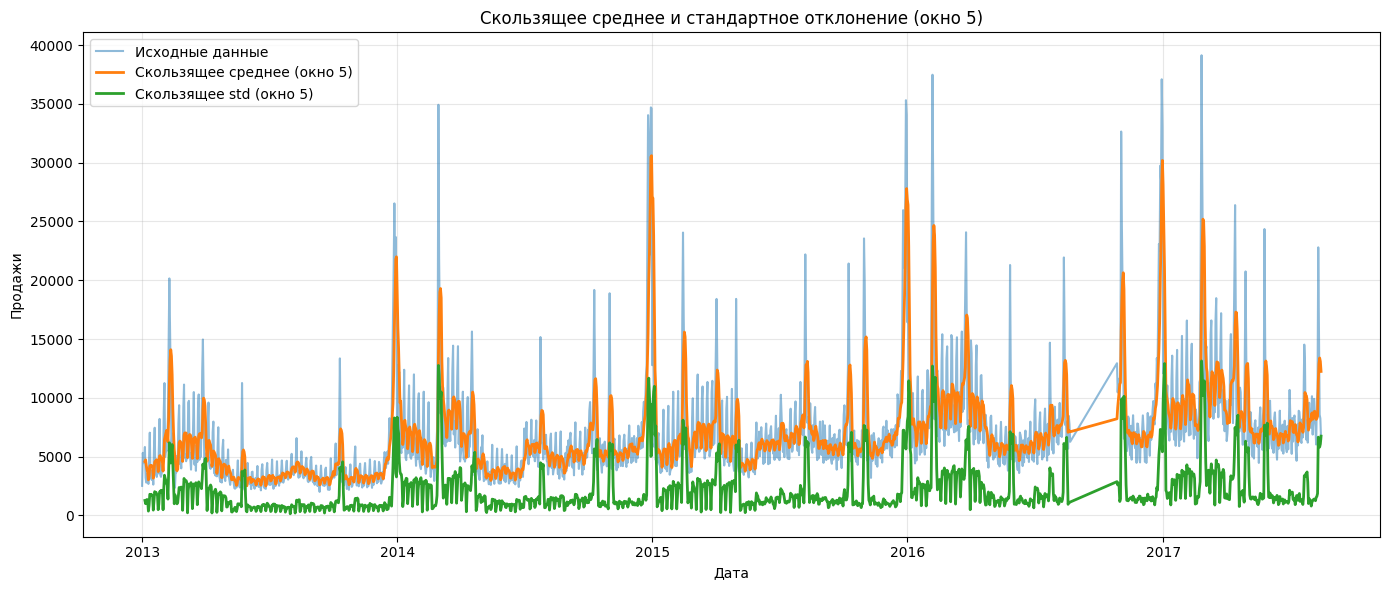


✅ Шаг 1-3 выполнен: построены скользящее среднее и std с окном 5


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Используем данные магазина 25 из предыдущего задания
# Убедимся, что дата - индекс
df_work = df.copy()
df_work = df_work.set_index('date')

# 1. Скользящее среднее с окном 5
rolling_mean_5 = df_work['unit_sales'].rolling(window=5).mean()

# 2. Скользящее стандартное отклонение с окном 5
rolling_std_5 = df_work['unit_sales'].rolling(window=5).std()

print("=" * 60)
print("СКОЛЬЗЯЩИЕ ХАРАКТЕРИСТИКИ (окно 5)")
print("=" * 60)
print("\nПервые 10 значений скользящего среднего (окно 5):")
print(rolling_mean_5.head(10))
print("\nПервые 10 значений скользящего std (окно 5):")
print(rolling_std_5.head(10))

# Визуализация
plt.figure(figsize=(14, 6))
plt.plot(df_work.index, df_work['unit_sales'], label='Исходные данные', alpha=0.5)
plt.plot(df_work.index, rolling_mean_5, label='Скользящее среднее (окно 5)', linewidth=2)
plt.plot(df_work.index, rolling_std_5, label='Скользящее std (окно 5)', linewidth=2)
plt.title('Скользящее среднее и стандартное отклонение (окно 5)')
plt.xlabel('Дата')
plt.ylabel('Продажи')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n✅ Шаг 1-3 выполнен: построены скользящее среднее и std с окном 5")